# Assignment 1 - A Star Search - Python Code

The following code is for you to complete using the instructions contained in the assignment document. Please follow instructions closely. Your first step should be to edit the map.py file to create your 40 by 40 grid map.

In [40]:
import numpy as np
from node import Node
from queue import PriorityQueue # https://docs.python.org/3/library/queue.html
from maps import DiscreteMap

# Algorithms

In [41]:
# You may uncomment/comment this code to experiment with different heuristics.

def distance(node1, node2):
    #euclidian_distance
    return np.sqrt((node1.x - node2.x)**2+(node1.y - node2.y)**2)

#def distance(node1, node2):
    #Manhattan_distance
    #return np.abs(node1.x - node2.x) + np.abs(node1.y - node2.y)

def heuristic(node1, node2):
    return distance(node1, node2)


In [42]:
def A_star(game_map, start_node, goal_node):
    
    isPrinted = False
    open_queue = PriorityQueue()# STEP 1. Create a new priority queue.
    path = [start_node]
    h = 0
    open_queue.put((h, (start_node, path)))
    
    discovered_nodes = set()
    
    while not open_queue.empty():
        cost, (current_node, path) = open_queue.get()
        
        if not current_node in discovered_nodes:
            discovered_nodes.add(current_node)
            
            if current_node == goal_node:
                cost_to_reach_goal_node = 0
                print("Goal node found!")
                for i in range(len(path) - 1):
                    cost_to_reach_goal_node += distance(path[i], path[i+1])
                return path, discovered_nodes, cost
                #STEP 2. return three objects/values here. 
                    #HINT: How do we use this function in our searches below?
            
            # Generate children and add to path
            for new_node in game_map.get_adjacent_nodes(current_node):
                new_path = path.copy()
                new_path.append(new_node)
                
                # STEP 3. Have the values f,g, and h print once during execution.
                # Cost to reach that node
                g = 0
                for i in range(len(path) - 1):
                    g += distance(path[i], path[i+1])
                    
                f = heuristic(new_node, goal_node)
                
                h = g + f
                
                if h == g and not isPrinted:
                    isPrinted = True
                    print(f'f: {f}\ng: {g}\nh: {h}')
                    
                open_queue.put((h, (new_node, new_path)))

# Discrete Grid Search

In [43]:
map_height = 40 # Your height here.
map_width = 40 # Your width here.

In [44]:
game_map = DiscreteMap(map_height, map_width)

## Search 1

f: 0.0
g: 62.35533905932735
h: 62.35533905932735
Goal node found!
Number of Nodes Explored:  708
Cost of the Path:  61.94112549695426


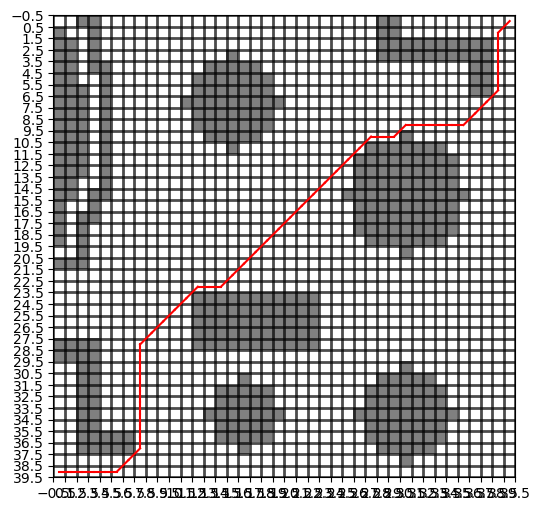

In [45]:
# Note: This code will error if the start or end nodes are set to wall locations.

# STEP 4. - Replace the values of X and Y so that your agent will begin in the lower left and end in the upper right.
path, discovered_nodes, cost = A_star(game_map, Node(0, 39), Node(39, 0))

# STEP 5. - Complete the below print statements to display the number of nodes explored and the cost of the path.
print("Number of Nodes Explored: ", len(discovered_nodes))
print("Cost of the Path: ", cost)

game_map.plot_path(path)

## Search 2

f: 0.0
g: 22.82842712474619
h: 22.82842712474619
Goal node found!
Number of Nodes Explored:  708
Cost of the Path:  22.82842712474619


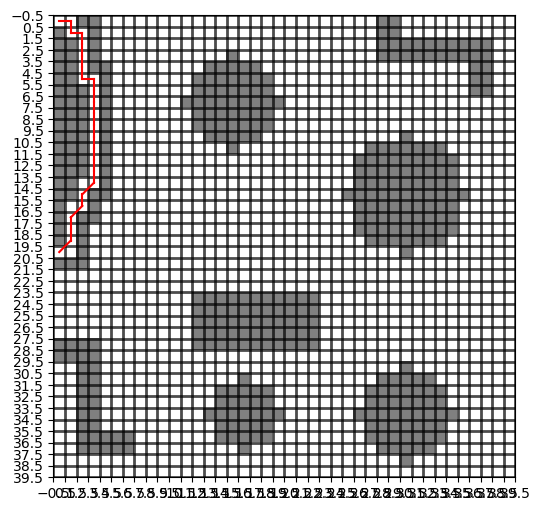

In [46]:
# STEP 6. Replace the values of Y with values ending at the middle left hand side of the map.
# STEP 7. There are typos in the below code. Fix these so the code will run.

path, discovered_node, cost = A_star(game_map, Node(0, 0), Node(0, 20))

# STEP 8. - Complete the below print statements to display the number of nodes explored and the cost of the path.
print("Number of Nodes Explored: ", len(discovered_nodes))
print("Cost of the Path: ", cost)
                                     
game_map.plot_path(path)